# Q4.1 归一化
# 导入数据集并提取数据

In [2]:
import scipy.io as scio
import numpy as np
from scipy.sparse import csc_matrix
%matplotlib inline
import matplotlib.pyplot as plt

# dataFile = 'C:\\Users\\Crunch\\Downloads\\DingDing\\others\\HW2\\hw2.mat'
data = scio.loadmat('hw2.mat')   #scio.loadmat(dataFile)

# 查看数据集的属性
type(data)  #dict
data.keys()

FileNotFoundError: [Errno 2] No such file or directory: 'hw2.mat'

In [2]:
#提取数据
X_raw=data['X']  #类型 scipy.sparse.csc.csc_matrix
X=X_raw.toarray()  #类型  numpy.ndarray (16087, 10013)
y=data['y']     #类型  numpy.ndarray (16087, 1)

## 归一化 $x_{ij}\leftarrow \frac {x_{ij}-\min{(x_i)} }{\max{(x_i)}-\min{(x_i)}}$

In [3]:
X=(X-X.min(0))/(X.max(0)-X.min(0)) #归一化
XX=np.hstack([np.ones(X.shape[0]).reshape(-1,1),X]) #(16087, 10014)

# Q4.2 求闭式解
## $ \hat{w}=(X^TX)^{-1}X^Ty$

In [1]:
# %%timeit   #3min 15s ± 2.45 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
%time w= np.linalg.inv( XX.T.dot(XX)).dot(XX.T).dot(y)  #Wall time: 2min 10s

NameError: name 'np' is not defined

In [9]:
w

array([[-3.27719862],
       [ 1.28726354],
       [ 0.93520616],
       ...,
       [ 1.45922689],
       [ 2.23809503],
       [ 0.10054219]])

# Q4.3 梯度下降法
## $f(w)=\frac 1n \|y-\bar{X}w\|_2^2$
$\nabla f(w)=\frac 2n \bar{X}^T (\bar{X}w-y )$

In [10]:
def fun(w,X_b,y):
    return np.sum((y - X_b.dot(w)) ** 2) / len(y)

def df(w,X_b,y):
    return X_b.T.dot(X_b.dot(w) - y) * 2. / len(X_b)


In [11]:
def gradient_descent(X_b, y, initial_w, target_w, alpha=6e-5, epsilon=1e-1, n_iters=1e5):
    w = initial_w
    cur_iter = 0
    mini=fun(target_w, X_b, y)  #0.06380990067366614
    maxi=fun(initial_w, X_b, y)-mini #fun(init_w, XX, y) 12.748345364337055
    history=[]
    while cur_iter < n_iters:
        gradient = df(w, X_b, y)
        w = w - alpha * gradient
        history.append(fun(w, X_b, y ))
        delta=abs(history[-1] - mini )
        if(delta>maxi):
            print('Not converge!')
            break
        if (delta < epsilon):
            print('delta=%f,epo=%d'%(delta,cur_iter) )
            plt.plot(history)
            plt.xlabel('k',fontsize=20)
            plt.ylabel('$f(w_k)$',color='pink',fontsize=20)
            plt.show()
            break

        cur_iter += 1
#         if(cur_iter%300==0):
#             print('delta=%f'%delta)
    return w

delta=0.099984,epo=1512


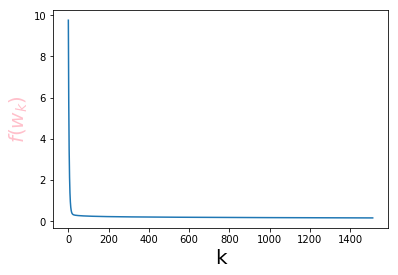

Wall time: 7min 15s


In [15]:
# w=np.linalg.inv( XX.T.dot(XX)).dot(XX.T).dot(y)
# %%timeit 
init_w=np.zeros((XX.shape[1],1))
%time   w_gd=gradient_descent(XX, y, init_w, w, alpha=0.6 )  ##Wall time: 7min 21s